# Vehicle Project Phase 2 Summary
This Jupyter Notebook (.ipynb) will serve as the skeleton file for your submission for Phase 2 of the Project. <br><br>

Note: To edit a Markdown cell, double-click on its text.

## Jupyter Notebook Quick Tips
Here are some quick formatting tips to get you started with Jupyter Notebooks. This is by no means exhaustive, and there are plenty of articles to highlight other things that can be done. We recommend using HTML syntax for Markdown but there is also Markdown syntax that is more streamlined and might be preferable. 
<a href = "https://towardsdatascience.com/markdown-cells-jupyter-notebook-d3bea8416671">Here's an article</a> that goes into more detail. (Double-click on cell to see syntax)

# Heading 1
## Heading 2
### Heading 3
#### Heading 4
<br>
<b>BoldText</b> or <i>ItalicText</i>
<br> <br>
Math Formulas: $x^2 + y^2 = 1$
<br> <br>
Line Breaks are done using br enclosed in < >.
<br><br>
Hyperlinks are done with: <a> https://www.google.com </a> or 
<a href="http://www.google.com">Google</a><br>

# Data Collection and Cleaning


Transfer/update the data collection and cleaning you created for Phase I below. You may include additional cleaning functions if you have extra datasets. 


## Downloaded Dataset Requirement



In [1]:
import pandas as pd
def data_parser():
    fedf = pd.read_csv('fueleconomydatacsv.csv', low_memory = False)
    x = fedf.iloc[2534:,:]
    for col in x.columns:
        if not col in ["Model Year", "Division", "Carline", "Comb FE (Guide) - Conventional Fuel"]:
            del x[col]
        
#     x.drop(
#     return x[not (x['Division'] in ["acura", "alfa romeo", "audi", "bmw", "buick", "cadillac", "chevrolet", "chrysler", "dodge", "fiat", "ford", "genesis", "gmc", "honda", "hyundai motor company", "infiniti", "jaguar", "jeep", "kia", "land rover", "lexus", "lincoln", "mazda", "mercedes-benz", "mini", "mitsubishi", "mitsubishi motors corporation", "nissan", "porsche", "ram", "subaru", "toyota", "volkswagen", "volvo cars of north america, llc"])].index
#         , inplace = True)

    for i in x.index:
        if (not x.loc[i,'Division'].lower() in ["acura", "alfa romeo", "audi", "bmw", "buick", "cadillac", "chevrolet", "chrysler", "dodge", "fiat", "ford", "genesis", "gmc", "honda", "hyundai motor company", "infiniti", "jaguar", "jeep", "kia", "land rover", "lexus", "lincoln", "mazda", "mercedes-benz", "mini", "mitsubishi", "mitsubishi motors corporation", "nissan", "porsche", "ram", "subaru", "toyota", "volkswagen", "volvo cars of north america, llc"]):
            x = x.drop([i])
    
    for i in x.index:
        x.loc[i,'Carline'] = x.loc[i,'Carline'].split()[0]
    
    x2019 = x.iloc[:1180,:]
    x2020 = x.iloc[1180:,:]
    x2019 = x2019.groupby(by=['Carline']).aggregate({'Model Year':'first','Division':'first','Comb FE (Guide) - Conventional Fuel':'mean'}).round(3)
    x2020 = x2020.groupby(by=['Carline']).aggregate({'Model Year':'first','Division':'first','Comb FE (Guide) - Conventional Fuel':'mean'}).round(3)
    
#     x=x.groupby(by=['Carline']).aggregate({'Division':'first','Comb FE (Guide) - Conventional Fuel':'mean'})
    
    
    
    names = []
    for i in x2019.index:
        a = x2019.loc[i,'Division'] + " " + i
        names.append(a)
    
    names1=[]
    for i in x2020.index:
        b = x2020.loc[i,'Division'] + " " + i
        names1.append(b)
        
    x2020.index = names1
    x2019.index = names
    
    x = pd.concat([x2019,x2020], axis = 0)
    for col in x.columns:
        if col in ['Division']:
            del x[col]
#     return x.loc['FIAT 124'].iloc[0].loc["Comb FE (Guide) - Conventional Fuel"]
    newdf = {}
    for a in x.index:
        try:
            newdf[a]= [x.loc[a].iloc[0].loc["Comb FE (Guide) - Conventional Fuel"], x.loc[a].iloc[1].loc["Comb FE (Guide) - Conventional Fuel"]]
        except:
            pass
    
    b = pd.DataFrame.from_dict(newdf, orient = 'index')
    b =b.rename(columns={0:2019,1:2020})
    for ee in b.index:
        b = b.rename({ee:ee.title()})
    
    for j in b.index:
        if "Volvo" in j:
            temp = j.split("Cars Of North America, Llc ")
            b = b.rename({j:"".join([temp[0],temp[1]])})
        elif "Hyundai" in j:
            temp = j.split("Motor Company ")
            b = b.rename({j:"".join([temp[0],temp[1]])})
        elif "Mitsubishi" in j:
            temp = j.split("Motors Corporation ")
            b = b.rename({j:"".join([temp[0],temp[1]])})
   
    
    
    
    
    b.to_csv('carFE.csv', index = True, header = True)
    return b
    
    
############ Function Call ############
data_parser()

,2019,2020
Fiat 124,29.500,29.500
Ram 1500,19.692,20.077
Bmw 230I,26.800,25.400
Chrysler 300,21.400,21.000
Bmw 330I,28.000,29.000
...,...,...
Jaguar Xf,27.286,24.857
Cadillac Xt4,25.000,25.000
Cadillac Xt5,21.500,22.000
Toyota Yaris,33.667,34.500


## Web Collection Requirement \#1


In [2]:
import re
import requests
from bs4 import BeautifulSoup
from pprint import pprint
import pandas as pd
import numpy as np
names  = []
#Cleaned the data as we collected it, so there is no unclean data file
def web_parser1():
    url = 'https://www.goodcarbadcar.net/2020-us-vehicle-sales-figures-by-model/'
    response = requests.get(url)
    soup = BeautifulSoup(response.text, "html.parser")
    tables = soup.find_all("table")
    table = tables[0]
    x = table.find_all("tr")
    salesdf = pd.DataFrame()
    recent =[]
    past = []
    data1 =[]
    for i in x:
        if len(i.find_all("td")) != 0:
            name = i.find_all("td")[0].get_text()
            recentsales = i.find_all("td")[1].get_text()
            pastsales = i.find_all("td")[2].get_text()
            if not "Q3 2020" in recentsales:
                if ","in recentsales:
                    recentsales = "".join(recentsales.split(","))
                if ","in pastsales:
                    pastsales = "".join(pastsales.split(","))
                
                try:
                    recentsales = float(recentsales)
                    pastsales = float(pastsales)
                except:
                    continue

                
            if name != "modelName":
                names.append(name)
                recent.append(recentsales)
                past.append(pastsales)

    for i in range(len(names)):
        salesdf.loc[names[i], "2019"] = recent[i]
        salesdf.loc[names[i], "2020"] = past[i]
    
    for ee in salesdf.index:
         salesdf= salesdf.rename({ee:ee.title()})
    
    
    
    salesdf.to_csv('q3carsales.csv', index = True, header = True)
    return salesdf
        
############ Function Call ############
web_parser1()

,2019,2020
Acura Ilx,935.0,1083.0
Acura Mdx,2961.0,3843.0
Acura Nsx,9.0,9.0
Acura Rdx,3493.0,4982.0
Acura Rlx,63.0,84.0
...,...,...
Volvo 60-Series,1021.0,1385.0
Volvo 90-Series,102.0,136.0
Volvo Xc40,1303.0,1615.0
Volvo Xc60,1737.0,2276.0


## Web Collection Requirement #2

In [3]:
import re
import requests
from bs4 import BeautifulSoup
from pprint import pprint
import pandas as pd
import numpy as np
import json
#Cleaned the data as we collected it, so there is no unclean data file
def web_parser2():
    ratingdf  = pd.DataFrame()
    for i in range(len(names)):
        make  = names[i].split()[0]
        model = names[i].split()[1]
        recenturl = "https://www.jdpower.com/cars/2020/"+ make + "/" + model
        response = requests.get(recenturl)
        soup = BeautifulSoup(response.text, "html.parser")
        h = soup.find_all("script")[2]
        try:
            recent_rating = json.loads(h.decode_contents())['review']['reviewRating']['ratingValue']
            
        except: 
            recent_rating = None
            
        ratingdf.loc[names[i],"2020"] = recent_rating
        
        
        
        pasturl = "https://www.jdpower.com/cars/2019/"+ make + "/" + model
        response1 = requests.get(pasturl)
        soup1 = BeautifulSoup(response1.text, "html.parser")
        h1 = soup1.find_all("script")[2]
        try:
            past_rating = json.loads(h1.decode_contents())['review']['reviewRating']['ratingValue']    
        except:
            past_rating = None
        ratingdf.loc[names[i],"2019"] = past_rating
        
    for ee in ratingdf.index:
        ratingdf = ratingdf.rename({ee:ee.title()})
        
    ratingdf.to_csv('carrating.csv', index = True, header = True)
    
    
    return ratingdf

############ Function Call ############
web_parser2()

,2020,2019
Acura Ilx,81,77
Acura Mdx,78,77
Acura Nsx,None,None
Acura Rdx,75,75
Acura Rlx,None,None
...,...,...
Volvo 60-Series,None,None
Volvo 90-Series,None,None
Volvo Xc40,76,78
Volvo Xc60,76,78


## Data Sources

Include sources (as links) to your datasets.

*   Downloaded Dataset Source: Fuel Economy Data for All US Car Models from 2017-2020: <a href="https://www.fueleconomy.gov/feg/download.shtml">https://www.fueleconomy.gov/feg/download.shtml</a> <br>
*   Web Collection #1 Source: Quarter 3 Car Sales in the US in 2019 and 2020: <a href="https://www.goodcarbadcar.net/2020-us-vehicle-sales-figures-by-model/">https://www.goodcarbadcar.net/2020-us-vehicle-sales-figures-by-model/</a> <br>
*   Web Collection #2 Source: 2019 and 2020 JD Power Car Ratings by model: <a href = "https://www.jdpower.com/cars">https://www.jdpower.com/cars</a> 

# Data Analysis
For the Data Analysis section, I will complete the following:

*   Create at least 5 insights
*   Generate at least 3 data visualizations
*   Export aggregated data to at least 2 summary files 


# Graphical User Interface (GUI) Implementation

## Insights

In [4]:
def insight1():
    fe = pd.read_csv('carFE.csv', index_col = 0)
    cs = pd.read_csv('q3carsales.csv', index_col = 0)
    del fe['2020']
    del cs['2020']
    
    
    df = pd.merge(fe,cs, left_index = True, right_index = True)
    
    df = df.rename(columns={'2019_x':"Fuel Economy",'2019_y':"Q3 Car Sales"})
    
    pd.set_option("display.max_rows", None, "display.max_columns", None)
    
    
    
    return df.corr(method = 'pearson')



############ Function Call ############
insight1()

,Fuel Economy,Q3 Car Sales
Fuel Economy,1.000000,0.183095
Q3 Car Sales,0.183095,1.000000


### Insight 1 Explanation

Companies are constantly looking for ways to improve certain aspects of their products in order to peak consumer interest, and more importantly, increase sales. Many times, the difference between a consumer purchasing one product over another is dependent simply on one factor. For this reason, we wanted to try and help car companies identify what factors could, in theory, help increase their sales. Fuel economy, a measure used to relate the amount of distance a car can travel with a certain amount of fuel, was a factor that we hypothesized would have a significant impact on a consumer's decision-making process when purchasing a new vehicle. In order to test whether fuel economy impacts car sales, we used car sales and fuel economy data from one year and ran a pearson correlational test to find the mathematical correlation coefficient. When we ran this test, we found the correlational coefficient to be approximately 0.159. Since this coefficient is positive, it shows a positive correlation between car sales and fuel economy (meaning that an increase in fuel economy is associated with an increase in car sales and vice versa). However, because the coefficient is so close to 0, the relationship between these variables is not statistically significant and therefore, we cannot state that there is any relationship between fuel economy and car sales. 
Though there could simply be no real correlation between these two variables, this could also be due to certain inconsistencies in our data set. While there was data on fuel economy for certain models, the car sales data set had no data for that specific model. For this reason, we dropped some models and grouped other models together by trim, which could be the reason for skewed results. If we had data on every model in both data sets, then our conclusions could be more accurate. Not having this data could be a major reason as to why a general conclusion for all vehicles generated a conclusion that showed that there is no statistically significant relationship between fuel economy and sales.  


In [5]:
def insight2():
 pass
    

##GUI in separate file



############ Function Call ############
insight2()

### Insight 2 Explanation

We wanted to provide an insight that would allow for companies to see how the ratings and sales vary for different models that have different fuel economies. This type of analysis would allow for insight on whether there is a correlation between car sales, ratings, and fuel economies for different makes, rather than looking at the big picture of all vehicles as a whole. In order to allow for this analysis, we created a GUI. The user selects the year and model they would like to see data for. Once the user presses the "Get Data!" button, the GUI generates the car sales, ratings, and fuel economy data for that specific model from the year selected. Because many cars have different specs across different years, many cars in the data set have differing fuel economies from 2019 to 2020. By selecting different years and the same model, the user can see if a change in fuel economy seemed to have an impact on the car sales/rating. Additionally, the user can see if different cars from the same manufacturer have differing values, which can allow for analysis across different manufacturers. This GUI allows for a broad range of analysis that is dependant on what the user would like to see.

In [6]:
def insight3():
 pass

##GUI in separate file

############ Function Call ############
insight3()

### Insight 3 Explanation

There are a variety of different factors that can impact car sales across the years. In fact, comparing across 2019 to 2020 brings in the possibility of COVID impacting car sales. We wanted a way for users to see if certain makes/cars by certain manufacturers were decreasing or increasing in sales. In order to do this, we created another GUI. This GUI allows the user to select the make they would like to see data for (only includes makes in our data set). Once the user presses the "Get data!" button, the GUI displays whether average car sales for that make have gone down or up and by what amount. If the sales have gone up, the output box turns green, and if they have gone down, the output box turns red. This allows for quick analysis across different makes to see if certain makes have become more or less popular from last year to this year. This GUI can again be used for a broad range of analysis that is dependent on the user's desire. A user could perhaps be trying to see if COVID has brought up sales in more luxurious cars, which this GUI could provide insight for. 

In [7]:
def insight4():
 pass

## GUI in separate file

############ Function Call ############
insight4()

### Insight 4 Explanation

Looking through specific car ratings can be inefficient in comparison to seeing car models in order of their rating. For this reason, we created a GUI that displays a slider, allowing the user to scroll through the car models in order of their rating. This can allow for the user to perhaps see what kinds of cars are on the lower end of the slider as opposed to the higher end. Looking at the sliders, it seems that many of the lower rated cars are Subarus and the cars on the higher end of the ratings are Chevrolets. To some degree, this shows that car make/manufacturer is a factor that has an impact on rating. 

In [8]:
import pandas as pd
def insight5():
    fe = pd.read_csv('carFE.csv', index_col = 0)
    cs = pd.read_csv('q3carsales.csv', index_col = 0)
     
    print("Please enter a Car Make: ")
    print("(Hint: Do not enter anything if you wish to see correlations for all vehicles.)")
    a = input()
    a = a.title()
    
    df = pd.merge(fe,cs, left_index = True, right_index = True)
    
    df = df.rename(columns={'2019_x':"2019 Fuel Economy",'2019_y':" 2019 Q3 Car Sales",'2020_x':"2020 Fuel Economy",'2020_y':"2020 Q3 Car Sales"})
    
    pd.set_option("display.max_rows", None, "display.max_columns", None)
  
    gettingdropped = []
    for i in df.index:
        if not a in i:
            gettingdropped.append(i)
    
    gettingdropped = list(set(gettingdropped))
    for i in gettingdropped:
        df = df.drop(i)

    try:
        x =  (df.corr(method = 'pearson'))
        if (x.isnull().values.any()):
            x = "Try Entering a Different Make!"
            
    except:
        x = "Try Again"
    
    return x


############ Function Call ############
insight5()

Please enter a Car Make: 
(Hint: Do not enter anything if you wish to see correlations for all vehicles.)
Acura


,2019 Fuel Economy,2020 Fuel Economy,2019 Q3 Car Sales,2020 Q3 Car Sales
2019 Fuel Economy,1.000000,1.000000,-0.115976,-0.142440
2020 Fuel Economy,1.000000,1.000000,-0.115976,-0.142440
2019 Q3 Car Sales,-0.115976,-0.115976,1.000000,0.997059
2020 Q3 Car Sales,-0.142440,-0.142440,0.997059,1.000000


### Insight 5 Explanation

In order to maximize sales, it is important for companies to see what factors are impacting sales. Though looking at specific data points can be beneficial, in some situations it can be more efficient to look at specific correlation numbers between the variables. For this reason, we generated an interactive function that allows for users to analyze the correlations between fuel economy and car sales across different years for certain makes. Once the user enters a car make, a table is displayed that shows the mathematical correlation coefficient between fuel economy and car sales. When "Honda" is enterred in the input box, we find that the correlation coefficent between 2019 car sales and fuel economy is -0.58721 and the correlation between 2020 car sales and 2020 fuel economy is -0.020554. Since the coefficient correlation is closer to 1, we can assume that there is a negative relationship between car sales and fuel economy for Hondas in 2019, meaning that as fuel economy decreased, car sales decreased. However, since the coefficient is so close to 0 for 2020, we cannot state that there is any relationship between the two variables in 2020. These numbers can be generated for every make, showing whether there is a relationship between car sales and fuel economy for that certain make. This can be beneficial when particular companies are trying to discover whether fuel economy truly has an impact on their sales. Many times, factors that play a part in a consumer's decision making process for one make, can be inconsequential in their decision to buy a car of another make. When entering each of the different makes that our data can generate statistical correlation values for, we saw that some had positive correlations between the two variables while others had negative correlations. This shows that it can be beneficial to look at how these two variables are related for each make rather than all vehicles as a whole.

## Data Visualizations

LinregressResult(slope=0.00012496217408966282, intercept=79.60778070410453, rvalue=0.9999999999999999, pvalue=0.0, stderr=1.8809863646246383e-13)

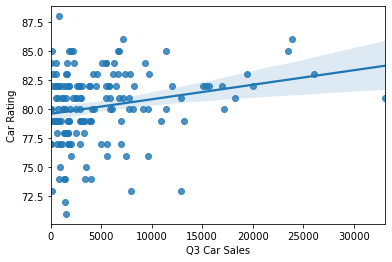

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy
from scipy.stats import linregress
def visual1():
    fe = pd.read_csv('carrating.csv', index_col = 0, low_memory = False)
    cr = pd.read_csv('q3carsales.csv', index_col = 0, low_memory = False)
    del fe['2020']
    del cr['2020']
    cr = cr.dropna()
    fe = fe.dropna()
    
    df = pd.merge(fe,cr, left_index = True, right_index = True)
    df = df.rename(columns={'2019_x':"Car Rating",'2019_y':"Q3 Car Sales"})
    df['Car Model'] = df.index
    df.reset_index(level =0, inplace = True)
    df.sort_values(by='Q3 Car Sales')
    
#     ax1 = plt.gca()
#     df.plot(kind='line',x='Car Model',y='Car Rating', ax = ax1)
#     df.plot(kind='line',x='Car Rating',y='Q3 Car Sales', color='red', ax=ax1)
#     df.plot.scatter('Q3 Car Sales', 'Car Rating')
    p = sns.regplot(x = 'Q3 Car Sales', y ='Car Rating', data = df)
    
    return scipy.stats.linregress(x=p.get_lines()[0].get_xdata(), y =p.get_lines()[0].get_ydata())



############ Function Call ############
visual1()

### Visualization 1 Explanation

The graph we generated is aimed at demonstrating the correlation between Car Ratings and Car Sales for all the data in our data sets in 2019. We used a Seaborn regplot to show this relationship. This type of model is used to plot data and a linear regression model fit, which is extremely beneficial to be able to draw a conclusion between car ratings and car sales. When looking at this graph, we can see that there is a slight positive correlation between the two variables, shown by the upward incline in the generated trend line. This shows that there is a positive, but relatively weak, statistical relationship between car ratings and car sales.

LinregressResult(slope=0.00017327455641634787, intercept=23.89298613933867, rvalue=0.18309468346109697, pvalue=0.018575168239600075, stderr=7.287203074984491e-05)

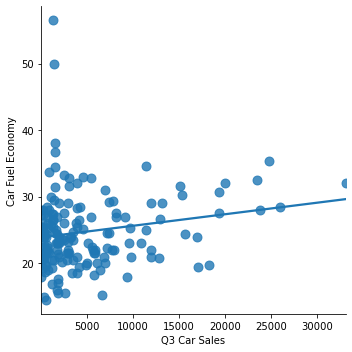

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy
from scipy.stats import linregress
def visual2():
    fe = pd.read_csv('carFE.csv', index_col = 0, low_memory = False)
    cr = pd.read_csv('q3carsales.csv', index_col = 0, low_memory = False)
    del fe['2020']
    del cr['2020']
    cr = cr.dropna()
    fe = fe.dropna()
    
    df = pd.merge(fe,cr, left_index = True, right_index = True)
    df = df.rename(columns={'2019_x':"Car Fuel Economy",'2019_y':"Q3 Car Sales"})
    df['Car Model'] = df.index
    df.reset_index(level =0, inplace = True)
    df.sort_values(by='Q3 Car Sales')
    
#     ax1 = plt.gca()
#     df.plot(kind='line',x='Car Model',y='Car Rating', ax = ax1)
#     df.plot(kind='line',x='Car Rating',y='Q3 Car Sales', color='red', ax=ax1)
#     df.plot.scatter('Q3 Car Sales', 'Car Fuel Economy')
#     sns.lmplot(x = 'Q3 Car Sales', y ='Car Fuel Economy', data = df)
    sns.lmplot(x="Q3 Car Sales", y="Car Fuel Economy", data=df,
           ci=None, scatter_kws={"s": 80})
    
    return scipy.stats.linregress(x=df["Q3 Car Sales"], y=df["Car Fuel Economy"])





############ Function Call ############
visual2()

### Visualization 2 Explanation

The next graph we generated is a seaborn.lmplot. The Seaborn library is built on top of the matplotlib library and is also closely integrated to pandas, which is why we chose this model for our data set. The lmplot() method is used to draw a 2D scatterplot with an overlaid regression line that shows a general trend in the data. In our graph, we can see that there is a general upward trend in the data points, showing a positive correlation between car sales and fuel economy. For this reason, we can say that, in 2019, as fuel economy increased, car sales increased as well. 

LinregressResult(slope=-0.01871040797784857, intercept=80.69522865496994, rvalue=-0.03401753486561356, pvalue=0.7099109985625589, stderr=0.05018089108690571)

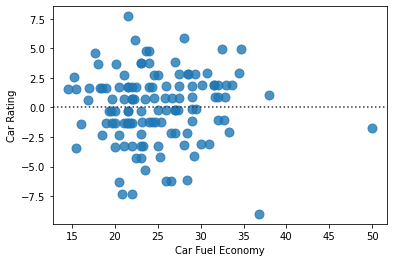

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy.stats import linregress
def visual3():
    fe = pd.read_csv('carFE.csv', index_col = 0, low_memory = False)
    cr = pd.read_csv('carrating.csv', index_col = 0, low_memory = False)
    del fe['2020']
    del cr['2020']
    cr = cr.dropna()
    fe = fe.dropna()
    
    df = pd.merge(fe,cr, left_index = True, right_index = True)
    df = df.rename(columns={'2019_x':"Car Fuel Economy",'2019_y':"Car Rating"})
    df['Car Model'] = df.index
    df.reset_index(level =0, inplace = True)
    df.sort_values(by='Car Rating')
    
#     ax1 = plt.gca()
#     df.plot(kind='line',x='Car Model',y='Car Rating', ax = ax1)
#     df.plot(kind='line',x='Car Rating',y='Q3 Car Sales', color='red', ax=ax1)
#     df.plot.scatter('Q3 Car Sales', 'Car Fuel Economy')
#     sns.lmplot(x = 'Q3 Car Sales', y ='Car Fuel Economy', data = df)
#     sns.lmplot(x="Q3 Car Sales", y="Car Fuel Economy", data=df,ci=None, scatter_kws={"s": 80})
    sns.residplot(x="Car Fuel Economy", y="Car Rating", data=df,
              scatter_kws={"s": 80});
    
    
    return scipy.stats.linregress(x=df["Car Fuel Economy"], y=df["Car Rating"])





############ Function Call ############
visual3()

### Visualization 3 Explanation

In order to develop a visualization for the relationship between car rating and car fuel economy, we used the Seaborn residual plot method. This method is used to plot the residuals of linear regression. This method of statistical analysis regresses car rating on car fuel economy and then draws a scatter plot of these residuals. Because the residual points are spread far from the line, this shows that there is a relatively weak relationship between car rating and car fuel economy. We are also able to notice a few outliers in the data that could provide for inaccuracy in our conclusions. For this reason, looking at the spread of residual points does not allow us to form a conclusive statement on whether fuel economy affects car rating. 

## Summary Files

In [12]:
import pandas as pd
def summary1():
    cs = pd.read_csv('q3carsales.csv', index_col = 0)
    make1 = []
    for name in cs.index:
        x = name.split()
        if "Alfa Romeo" in name:
            x = x[:2]
            x = " ".join(x)
        elif "Land Rover" in name:
            x = x[:2]
            x = " ".join(x)
        else:
            x = x[0]
        make1.append(x)
    cs.index = make1
    cs.reset_index(inplace=True)
    cs= cs.groupby(["index"]).aggregate({'2019':'mean', '2020': 'mean'}).round(3)
    cs.to_csv("avgsalesbymake.csv", index = True)
    return cs
############ Function Call ############
summary1()

,2019,2020
index,,
Acura,1538.333,2044.000
Alfa Romeo,400.667,519.000
Audi,1033.692,1338.154
Bmw,1294.647,1470.706
Buick,1571.571,2034.571
Cadillac,984.900,1275.200
Chevrolet,7411.000,9384.316
Chrysler,2446.250,3166.750
Dodge,4113.571,5325.571


In [13]:
def summary2():
    cr = pd.read_csv('carrating.csv', index_col = 0)
    make1 = []
    for name in cr.index:
        x = name.split()
        if "Alfa Romeo" in name:
            x = x[:2]
            x = " ".join(x)
        elif "Land Rover" in name:
            x = x[:2]
            x = " ".join(x)
        else:
            x = x[0]
        make1.append(x)
    cr.index = make1
    cr.reset_index(inplace=True)
    cr= cr.groupby(["index"]).aggregate({'2019':'mean', '2020': 'mean'}).round(3)
    cr.to_csv("avgratingbymake.csv", index = True)
    return cr


############ Function Call ############
summary2()

,2019,2020
index,,
Acura,77.000,78.000
Alfa Romeo,NaN,NaN
Audi,78.571,76.500
Bmw,80.000,78.643
Buick,83.000,84.250
Cadillac,79.000,82.167
Chevrolet,82.533,84.083
Chrysler,76.000,75.000
Dodge,81.333,83.667


# Cited Sources

If you used any additional sources to complete your Data Analysis section, list them here:


*   https://pythonbasics.org/pyqt-combobox/
*   https://seaborn.pydata.org/tutorial/regression.html
*   https://stackoverflow.com/questions/33490833/display-regression-equation-in-seaborn-regplot



# Video Presentation

If you uploaded your Video Presentation to Bluejeans, YouTube, or any other streaming services, please provide the link here:


*   https://youtu.be/HaEG9nfSOOQ



Make sure the video sharing permissions are accessible for anyone with the provided link.